In [ ]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import statsmodels.api as sm
# Estadísticas
import scipy 
from scipy import stats
# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split
# Modelo de Clasificación 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import files

# Cargar un archivo desde la computadora
uploaded = files.upload()

Saving Datos_Cardiopatia00.csv to Datos_Cardiopatia00.csv


In [ ]:
import pandas as pd

# Leer un archivo CSV en un DataFrame
data = pd.read_csv('Datos_Cardiopatia00.csv')

In [ ]:
data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
frecuencia = (data.groupby("HeartDisease").agg(frecuencia=("HeartDisease","count")).reset_index())
  
frecuencia

,HeartDisease,frecuencia
0,No,292422
1,Yes,27373


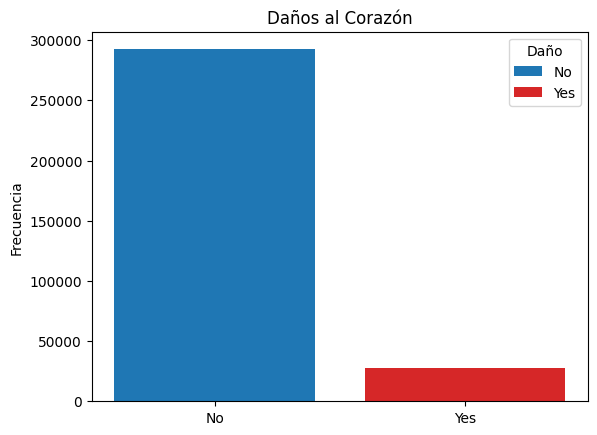

In [ ]:
fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']
#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['HeartDisease'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)
ax.set_ylabel('Frecuencia')
ax.set_title('Daños al Corazón')
ax.legend(title='Daño')
plt.show()

In [ ]:
data['HeartDisease01'] = np.where(data['HeartDisease']== "Yes", 1, 0)

In [ ]:
data = data.drop("HeartDisease", axis='columns')

In [ ]:
data.columns.values

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease01'], dtype=object)

In [ ]:
print("Observaciones y variables: ", data.shape)

Observaciones y variables:  (319795, 18)


In [ ]:
data.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease01        int64
dtype: object

In [ ]:
datos_dummis = pd.get_dummies(data, drop_first = True)
datos_dummis

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
datos_dummis.dtypes

BMI                                float64
PhysicalHealth                     float64
MentalHealth                       float64
SleepTime                          float64
HeartDisease01                       int64
Smoking_Yes                          uint8
AlcoholDrinking_Yes                  uint8
Stroke_Yes                           uint8
DiffWalking_Yes                      uint8
Sex_Male                             uint8
AgeCategory_25-29                    uint8
AgeCategory_30-34                    uint8
AgeCategory_35-39                    uint8
AgeCategory_40-44                    uint8
AgeCategory_45-49                    uint8
AgeCategory_50-54                    uint8
AgeCategory_55-59                    uint8
AgeCategory_60-64                    uint8
AgeCategory_65-69                    uint8
AgeCategory_70-74                    uint8
AgeCategory_75-79                    uint8
AgeCategory_80 or older              uint8
Race_Asian                           uint8
Race_Black 

In [ ]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos_dummis.drop(columns = "HeartDisease01"), datos_dummis['HeartDisease01'],train_size = 0.80,  random_state = 1301)

In [ ]:
X_entrena

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
180465,25.10,0.0,0.0,4.0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
313740,28.19,0.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
248876,31.17,0.0,30.0,4.0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
211494,26.30,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
252218,48.42,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294369,25.85,3.0,20.0,6.0,1,0,0,1,1,0,...,1,0,1,1,0,0,0,1,0,0
217777,28.06,0.0,0.0,12.0,1,1,1,1,1,0,...,0,0,0,0,1,0,0,0,1,1
283473,24.89,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
207028,20.22,1.0,10.0,7.0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
X_valida

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
215733,29.12,0.0,0.0,8.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,1
208695,20.50,0.0,12.0,7.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
55576,21.58,0.0,0.0,9.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
180928,27.89,0.0,0.0,5.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,1
301064,28.34,7.0,2.0,10.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178906,19.40,0.0,30.0,3.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
122972,43.05,25.0,15.0,4.0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,1,0
138890,41.05,0.0,0.0,7.0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
127826,24.33,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
modelo_ac = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 1301
          )

In [ ]:
modelo_ac.fit(X_entrena, Y_entrena)

DecisionTreeClassifier(max_depth=5, random_state=1301)

Profundidad del árbol: 5


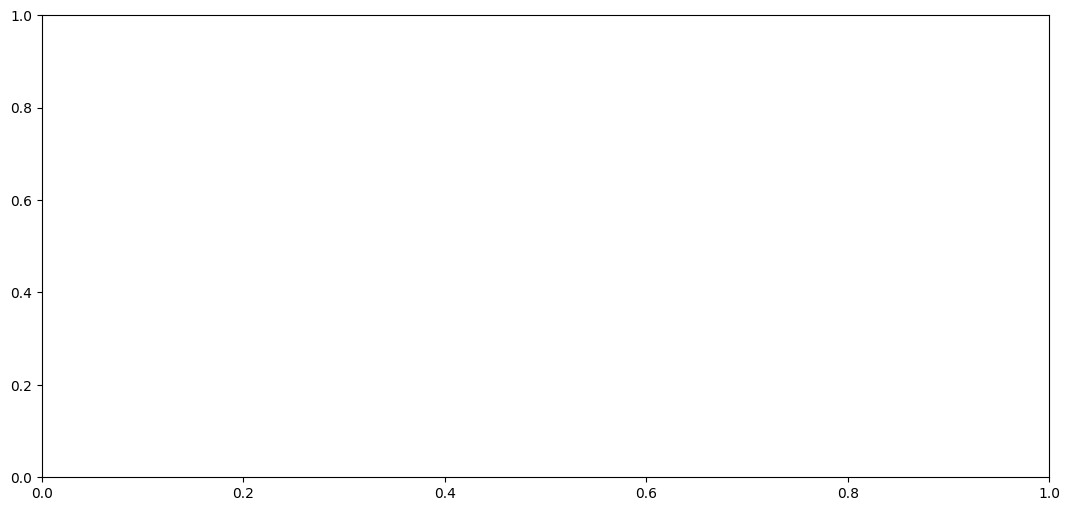

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
print(f"Profundidad del árbol: {modelo_ac.get_depth()}")

In [ ]:
plot = plot_tree(
            decision_tree = modelo_ac,
            #feature_names = modelo_ac.tolist(),
            class_names   = 'Daño al corazón',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

In [ ]:
texto_modelo = export_text(
                    decision_tree = modelo_ac,
                    feature_names = list(datos_dummis.drop(columns = "HeartDisease01").columns)
               )
print(texto_modelo)

|--- DiffWalking_Yes <= 0.50
|   |--- Stroke_Yes <= 0.50
|   |   |--- Diabetic_Yes <= 0.50
|   |   |   |--- AgeCategory_80 or older <= 0.50
|   |   |   |   |--- AgeCategory_75-79 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- AgeCategory_75-79 >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- AgeCategory_80 or older >  0.50
|   |   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Sex_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- Diabetic_Yes >  0.50
|   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |--- KidneyDisease_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- KidneyDisease_Yes >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sex_Male >  0.50
|   |   |   |   |--- Smoking_Yes <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Smoking_Yes >  0.50
|   |   |   |   |   |--- class: 0
|   |--- Stroke_Yes >  0.50
|   |   |--- Diabetic_Yes <= 0.50
|   |   |   |--- GenHealth_Fa

In [ ]:
predicciones = modelo_ac.predict(X_valida)
print(predicciones)

[0 0 0 ... 0 0 0]


In [ ]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(HeartDisease_Real = Y_valida)
comparaciones = comparaciones.assign(HeartDisease_Pred = predicciones.flatten().tolist())
print(comparaciones)

          BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_Yes  \
215733  29.12             0.0           0.0        8.0            0   
208695  20.50             0.0          12.0        7.0            0   
55576   21.58             0.0           0.0        9.0            0   
180928  27.89             0.0           0.0        5.0            0   
301064  28.34             7.0           2.0       10.0            0   
...       ...             ...           ...        ...          ...   
178906  19.40             0.0          30.0        3.0            0   
122972  43.05            25.0          15.0        4.0            1   
138890  41.05             0.0           0.0        7.0            1   
127826  24.33             0.0           0.0        8.0            0   
297715  32.69             0.0          30.0        6.0            1   

        AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
215733                    0           0                1         0   
208695 

In [ ]:
print(confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

[[58334   173]
 [ 5216   236]]


In [ ]:
print(classification_report(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58507
           1       0.58      0.04      0.08      5452

    accuracy                           0.92     63959
   macro avg       0.75      0.52      0.52     63959
weighted avg       0.89      0.92      0.88     63959



In [ ]:
accuracy = accuracy_score(
    y_true = comparaciones['HeartDisease_Real'],
    y_pred = comparaciones['HeartDisease_Pred'],
    normalize = True
    )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 91.57428977938991 %


In [ ]:
# Se crea un diccionario
registro = {'BMI': 38, 'PhysicalHealth': 2, 'MentalHealth': 5, 'SleepTime' : 12, 'Smoking_Yes' : 1, 'AlcoholDrinking_Yes' : 1, 'Stroke_Yes' : 1, 'DiffWalking_Yes': 1, 'Sex_Male': 1, 
'AgeCategory_25-29' : 0, 'AgeCategory_30-34' : 0, 
'AgeCategory_35-39' : 0, 'AgeCategory_40-44' : 0, 
'AgeCategory_45-49' : 0, 'AgeCategory_50-54' : 0,
'AgeCategory_55-59' : 0, 'AgeCategory_60-64' : 0,
'AgeCategory_65-69' : 0, 'AgeCategory_70-74': 1, 
'AgeCategory_75-79' : 0, 'AgeCategory_80 or older' : 0,         'Race_Asian' : 0, 'Race_Black' : 1, 'Race_Hispanic' : 0,
'Race_Other' : 0, 'Race_White' : 0, 'Diabetic_Yes' : 1,
'Diabetic_Yes (during pregnancy)' : 0, 
'PhysicalActivity_Yes' : 0, 'GenHealth_Fair' : 1, 
'GenHealth_Good' : 0, 'GenHealth_Poor' : 0, 
'GenHealth_Very good' : 0, 'Asthma_Yes' : 1, 'KidneyDisease_Yes':1, 'SkinCancer_Yes': 0}
persona = pd.DataFrame()
persona = persona.append(registro, ignore_index=True)
persona

<ipython-input-74-448bd7e726d7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  persona = persona.append(registro, ignore_index=True)


,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,38,2,5,12,1,1,1,1,1,0,...,1,0,0,1,0,0,0,1,1,0


In [ ]:
prediccion = modelo_ac.predict(persona)
print(prediccion)

[1]
